# CMRM Homework Assignment No. 1

In [112]:
import os
import numpy as np 
import pandas as pd # pip install pandas
import scipy
import matplotlib.pyplot as plt
import librosa
import sklearn # pip install sklearn
from tqdm import tqdm
import joblib
from sklearn.metrics import accuracy_score, classification_report
import random

## Question 1

In [113]:
# Load .csv files
#Load the train dataset mitbih train.csv
file_path = os.path.join('dataset\dataset', 'mitbih_train.csv')
# Load the dataset considering the first row not has a header
df = pd.read_csv(file_path , header=None)

# Select columns from index 0 to 10 (inclusive) and the first 20 rows
selected_columns = df.iloc[:10, :19]  # Rows, columns

# Display the result in order to have an idea of the result
display(selected_columns)
#number of items
print(df.size)
#data shape
print(df.shape)

#number and names of classes
class_labels = df.iloc[:, -1].unique()
print("Present classes:", class_labels)
print("Number of classes:", len(class_labels))





#Load the test dataset mitbih test.csv
file_path2 = os.path.join('dataset\dataset', 'mitbih_test.csv')
df2 = pd.read_csv(file_path2, header=None)

# Select columns from index 0 to 3 (inclusive) and the first 20 rows
selected_columns2 = df.iloc[:20, 0:15]  
# Display the result
display(selected_columns2)
#to recompute without header=none 
print(df2.size) 
print(df2.shape) 

#number and names of classes
class_labels2 = df2.iloc[:, -1].unique()
print("Present classes:", class_labels2)
print("Number of classes:", len(class_labels2))





# Define a dictionary associating the class indices to their labels
label_names = {
    0: 'N',  # Normal
    1: 'S',  # Fusion of paced and normal
    2: 'V',  # Premature ventricular contraction
    3: 'F',  # Artial premature
    4: 'Q'   # Fusion of ventricular and normal
}



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,0.328152,0.417962,0.426598,0.442142,0.433506,0.435233,0.449050,0.435233,0.402418
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,0.534722,0.590278,0.576389,0.597222,0.576389,0.597222,0.576389,0.625000,0.611111
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,0.020649,0.000000,0.002950,0.026549,0.067847,0.082596,0.138643,0.165192,0.212389
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,0.396226,0.402516,0.412998,0.412998,0.415094,0.433962,0.442348,0.444444,0.452830
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,0.189824,0.152642,0.133072,0.162427,0.152642,0.119374,0.129159,0.142857,0.127202


16460152
(87554, 188)
Present classes: [0. 1. 2. 3. 4.]
Number of classes: 5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,0.328152,0.417962,0.426598,0.442142,0.433506
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,0.534722,0.590278,0.576389,0.597222,0.576389
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,0.020649,0.000000,0.002950,0.026549,0.067847
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,0.396226,0.402516,0.412998,0.412998,0.415094
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,0.189824,0.152642,0.133072,0.162427,0.152642


4115696
(21892, 188)
Present classes: [0. 1. 2. 3. 4.]
Number of classes: 5


Class distribution in the training set:
187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

Class distribution in the test set:
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


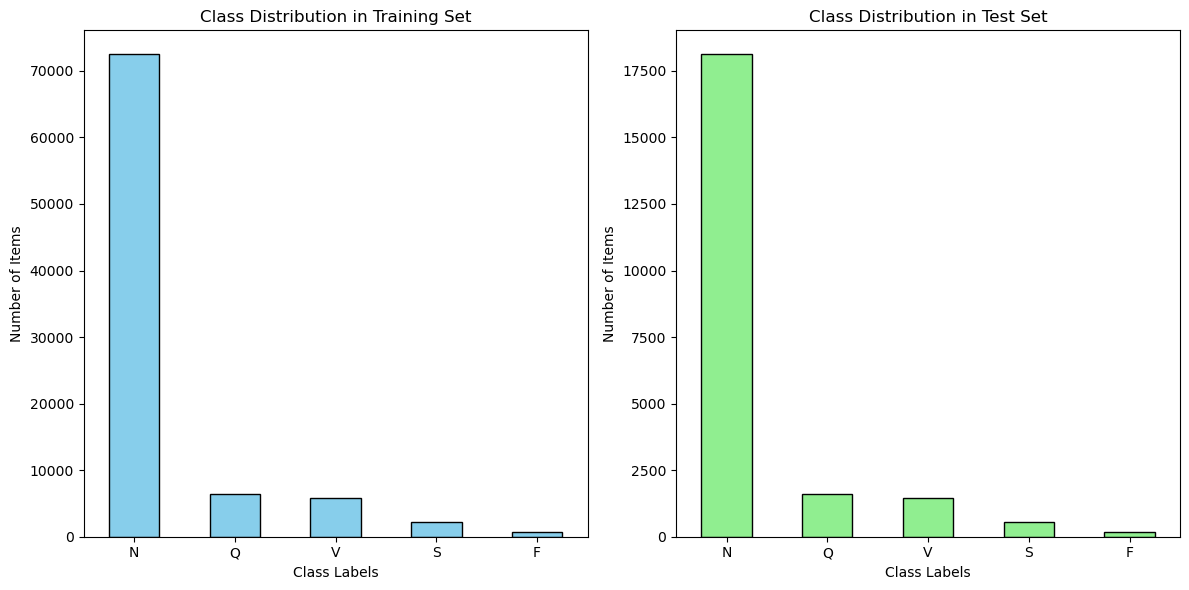

In [114]:
# Take a look at the dataset distribution
# Train
# Get the class distribution from the last column (index 187)
train_class_counts = df.iloc[:, -1].value_counts()

# Print the number of items in each class for both train and test datasets
print("Class distribution in the training set:")
print(train_class_counts)

# Convert class indices to meaningful labels using label_names
train_class_labels = train_class_counts.index.map(label_names)



# Test
test_class_counts = df2.iloc[:, -1].value_counts()

print("\nClass distribution in the test set:")
print(test_class_counts)

test_class_labels = test_class_counts.index.map(label_names)




# Plot the class distribution for the training dataset
plt.figure(figsize=(12, 6))

# Plot for training set
plt.subplot(1, 2, 1)
train_class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Items')
plt.xticks(ticks=range(len(train_class_labels)), labels=train_class_labels, rotation=0)

# Plot for testing set
plt.subplot(1, 2, 2)
test_class_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Items')
plt.xticks(ticks=range(len(test_class_labels)), labels=test_class_labels, rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


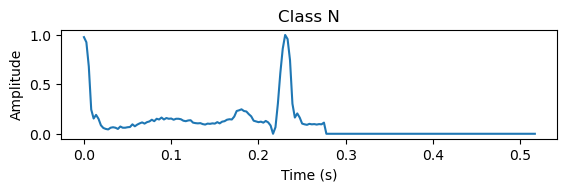

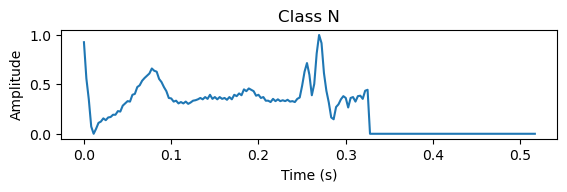

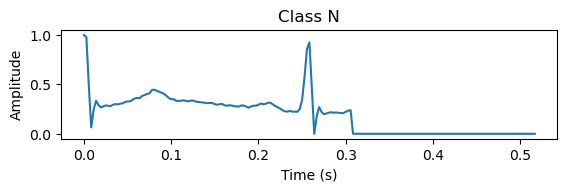

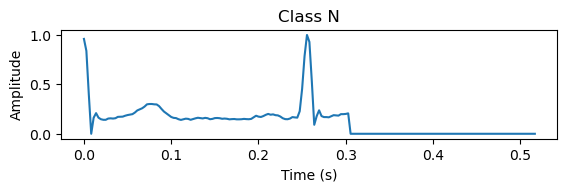

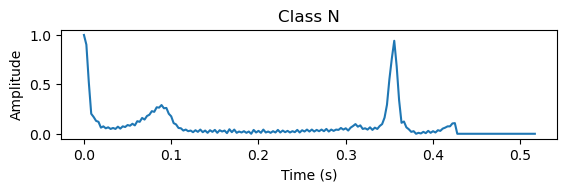

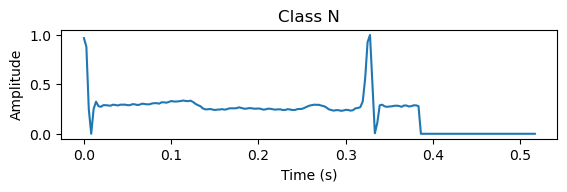

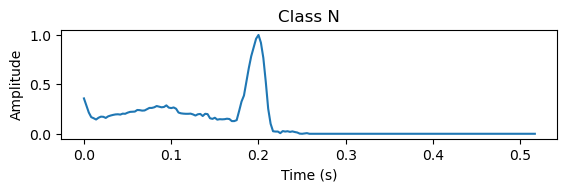

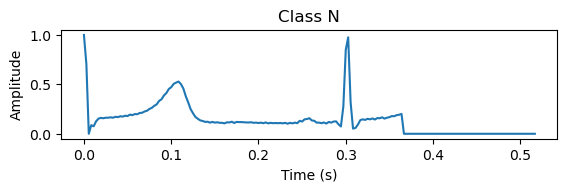

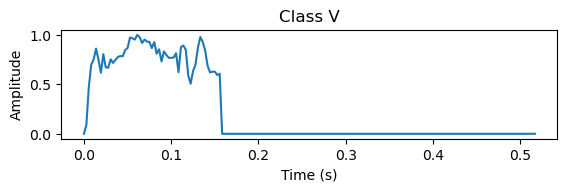

-------------------df2-------------------


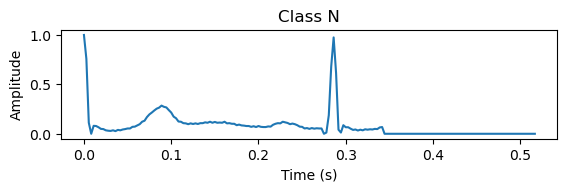

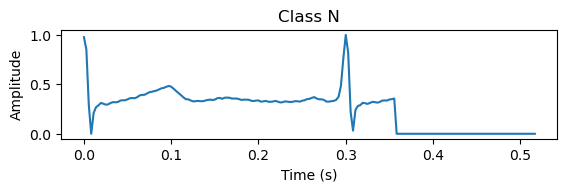

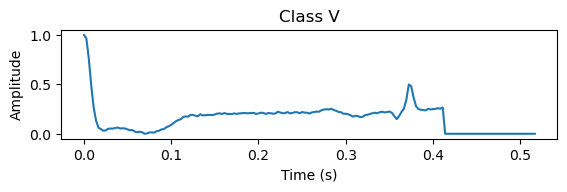

In [115]:
# Plot some ECG curves
Fs = 360
# Define first and last indices (entire dataset in this case)
first, last = 0, len(df) 

# Create a time array in seconds
time = np.arange(df.shape[1]-1) / Fs

# Plot each selected waveform
for idx in range(first, last, 10000):
    # Select the waveform and corresponding label 
    waveform = df.iloc[idx, :-1].values  # All columns except the last
    label = label_names[df.iloc[idx ,-1]]   # Last column is label
    
    # Plot waveform
    plt.subplot(3, 1, (idx+1)-idx  )
    plt.plot(time, waveform)
    plt.title(f"Class {label}")  # Label the title with the class
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
   

# Define first and last indices (entire dataset in this case)
first, last = 0, len(df2) 

print("-------------------df2-------------------")

# Create a time array in seconds
time = np.arange(df2.shape[1]-1) / Fs

# Plot each selected waveform
for idx in range(first, last, 10000):
    # Select the waveform and corresponding label 
    waveform = df2.iloc[idx, :-1].values  # All columns except the last
    label = label_names[df2.iloc[idx ,-1]]   # Last column is label

    
    # Plot waveform
    plt.subplot(3, 1, (idx+1)-idx  )
    plt.plot(time, waveform)
    plt.title(f"Class {label}")  # Label the title with the class
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


(8755, 188)
Class distribution in the training set:
187
0.0    7240
4.0     634
2.0     623
1.0     201
3.0      57
Name: count, dtype: int64
(2189, 188)

Class distribution in the test set:
187
0.0    1796
4.0     159
2.0     153
1.0      62
3.0      19
Name: count, dtype: int64


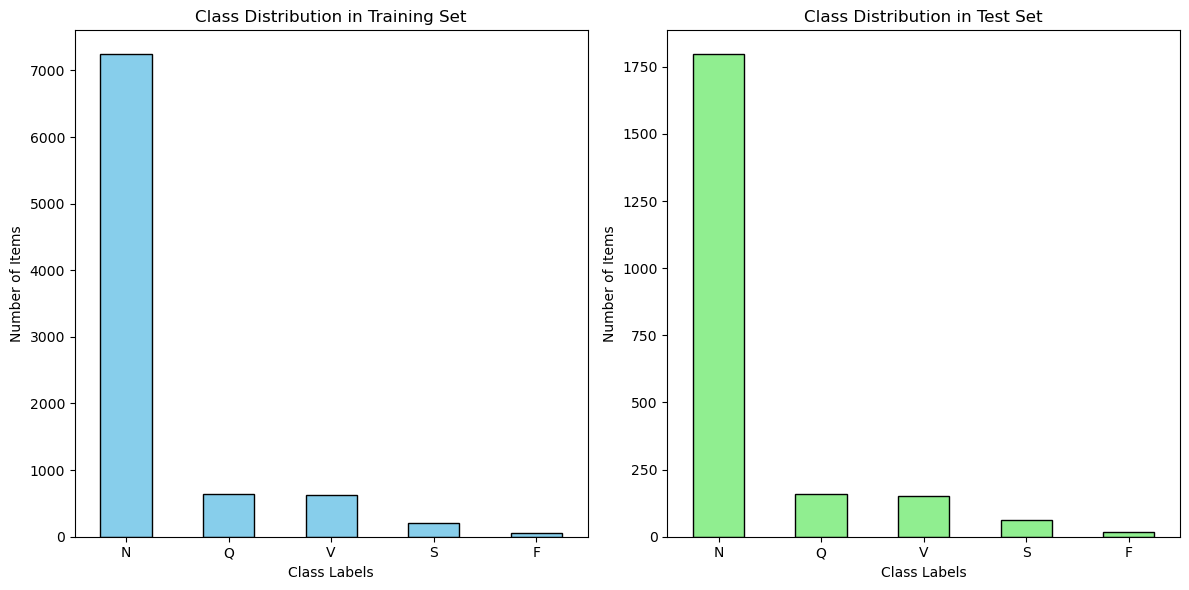

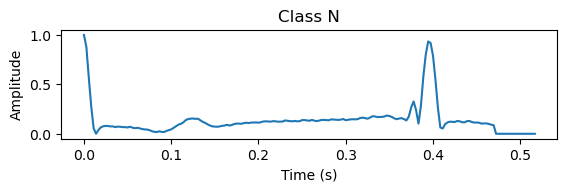

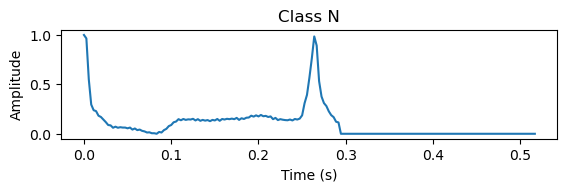

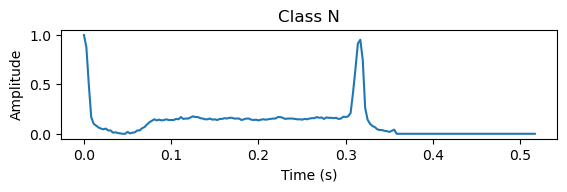

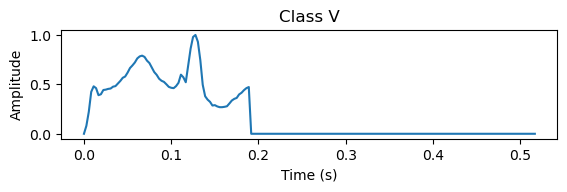

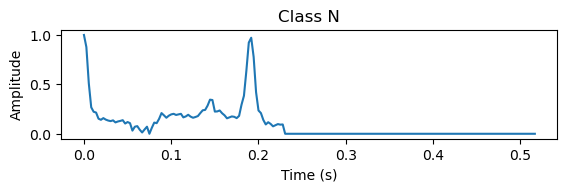

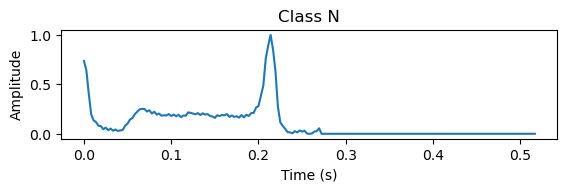

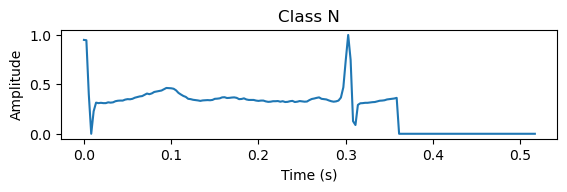

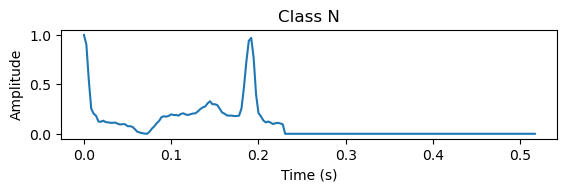

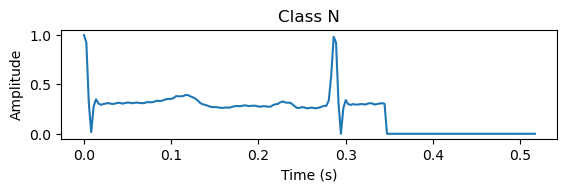

-------------------df2-------------------


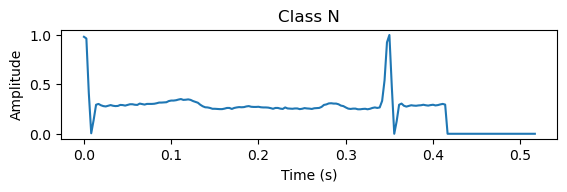

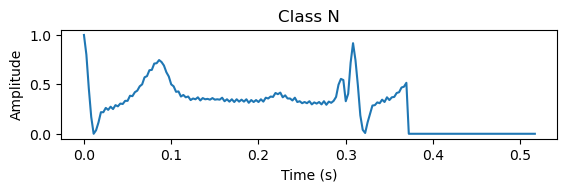

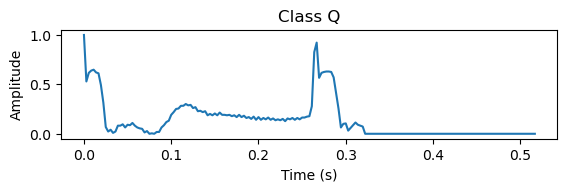

(8755,)
(8755, 187)
(2189,)
(2189, 187)


In [116]:
# Extract a subset of the dataset
from sklearn.model_selection import train_test_split

resize = 0.1


# Train
train_df,_ = train_test_split(df, train_size=resize, random_state=28)
#data shape
print(train_df.shape)

# Get the class distribution from the last column (index 187)
train_class_counts = train_df.iloc[:, -1].value_counts()

# Print the number of items in each class for both train and test datasets
print("Class distribution in the training set:")
print(train_class_counts)

# Convert class indices to meaningful labels using label_names
train_class_labels = train_class_counts.index.map(label_names)



# Test
test_df,_ = train_test_split(df2, train_size=resize, random_state=5)
#data shape
print(test_df.shape)

test_class_counts = test_df.iloc[:, -1].value_counts()
############test_class_counts = test_df.iloc[:, -1].value_counts(normalize=True)
print("\nClass distribution in the test set:")
print(test_class_counts)

test_class_labels = test_class_counts.index.map(label_names)



# Plot the class distribution for the training dataset
plt.figure(figsize=(12, 6))

# Plot for training set
plt.subplot(1, 2, 1)
train_class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Items')
plt.xticks(ticks=range(len(train_class_labels)), labels=train_class_labels, rotation=0)

# Plot for testing set
plt.subplot(1, 2, 2)
test_class_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Items')
plt.xticks(ticks=range(len(test_class_labels)), labels=test_class_labels, rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



# Plot some ECG curves
Fs = 360
# Define first and last indices (entire dataset in this case)
first, last = 0, len(train_df) 

# Create a time array in seconds
time = np.arange(train_df.shape[1]-1) / Fs

# Plot each selected waveform
for idx in range(first, last, int(10000*resize)):
    # Select the waveform and corresponding label 
    waveform = train_df.iloc[idx, :-1].values  # All columns except the last
    label = label_names[train_df.iloc[idx ,-1]]   # Last column is label
    
    # Plot waveform
    plt.subplot(3, 1, (idx+1)-idx  )
    plt.plot(time, waveform)
    plt.title(f"Class {label}")  # Label the title with the class
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
   

# Define first and last indices (entire dataset in this case)
first, last = 0, len(test_df) 

print("-------------------df2-------------------")

# Create a time array in seconds
time = np.arange(test_df.shape[1]-1) / Fs

# Plot each selected waveform
for idx in range(first, last, int(10000*resize)):
    # Select the waveform and corresponding label 
    waveform = test_df.iloc[idx, :-1].values  # All columns except the last
    label = label_names[test_df.iloc[idx ,-1]]   # Last column is label

    
    # Plot waveform
    plt.subplot(3, 1, (idx+1)-idx  )
    plt.plot(time, waveform)
    plt.title(f"Class {label}")  # Label the title with the class
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Define label lists and data numpy arrays

# Train 
labels_train = train_df.iloc[: ,-1]  # Last column 
print(labels_train.shape)
labels_train = train_df.iloc[: ,-1].tolist()  # Last column 
train_df = train_df.iloc[:, :-1]  # All columns except the last
print(train_df.shape)

# Test
labels_test = test_df.iloc[: ,-1]  # Last column 
print(labels_test.shape)
labels_test = test_df.iloc[: ,-1].tolist()  # Last column 
test_df = test_df.iloc[:, :-1]  # All columns except the last
print(test_df.shape)


## Question 2

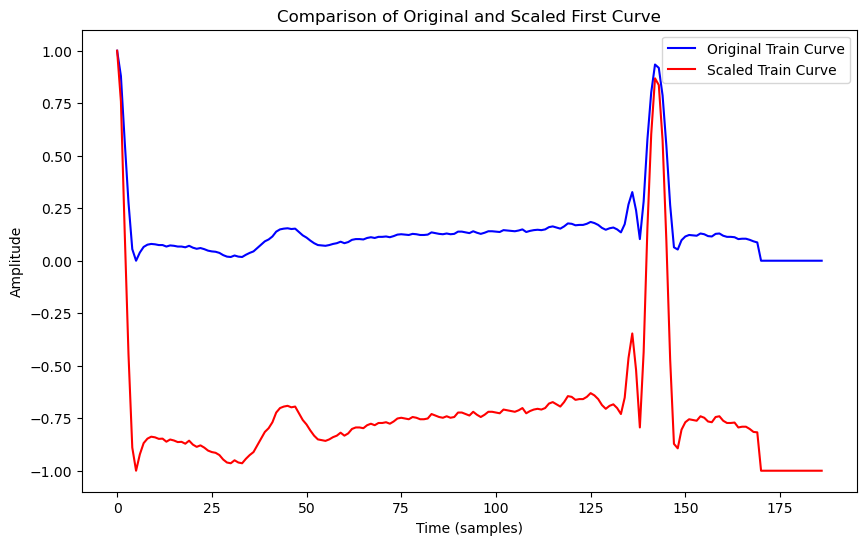

In [117]:
from sklearn.preprocessing import MinMaxScaler
# Preprocessing
# Convert the values of train_df and test_df to lists
train_list = train_df.values.tolist()  
test_list = test_df.values.tolist()

# Define the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply the scaler to the training data and store the result in train_set
train_set = scaler.fit_transform(train_list)

# Apply the same scaler to the test data and store the result in test_set
test_set = scaler.transform(test_list)



# Plot
# Plot the first curve from train_list and train_set
plt.figure(figsize=(10, 6))

# Plot the first curve from the original data (train_list)
plt.plot(train_list[0], label='Original Train Curve', color='blue')

# Plot the first curve after scaling (train_set)
plt.plot(train_set[0], label='Scaled Train Curve', color='red')

# Add labels and legend
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Scaled First Curve')
plt.legend()

# Show the plot
plt.show()



In [118]:
def compute_feature_vector(x, Fs, N=64, H=16):
    """Compute the feature vector 

    Args:
        x: Input signal
        Fs: Sampling rate
        N: Window length
        H: Hop size

    Returns:
        f_vector: Feature vector
    """
    
    # Compute features
    # Compute standard deviation and mean of the ECG waveform
    std_dev = np.std(x)
    mean = np.mean(x)

    # Compute zero-crossing rate using librosa (windowed by N and hopped by H)
    zero_crossings = librosa.feature.zero_crossing_rate(y=x, frame_length=N, hop_length=H)

    #The zero-crossing rate (ZCR) is defined as the rate at which a signal changes from positive to negative or vice versa. 
    #In rhythmic analysis, ZCR can capture the periodicity or frequency of beat events; a higher ZCR indicates a rhythm with frequent oscillations,
    #which might be indicative of rapid heart rhythms or irregularities.

    # Compute standard deviation and mean of the zero-crossing rate
    std_dev_zcr = np.std(zero_crossings)
    mean_zcr = np.mean(zero_crossings)

    # Compute STFT of the waveform and take absolute value
    C = np.abs(librosa.stft(x, n_fft=N, hop_length=H))

    # Convert STFT to decibel scale
    C_db = librosa.amplitude_to_db(C, ref=np.max)
    
    # Compute spectral flux
    spectral_flux = librosa.onset.onset_strength(S=C_db, sr=Fs)
    std_dev_flux = np.std(spectral_flux)
    mean_flux = np.mean(spectral_flux)

    #Spectral flux measures the rate of change in the power spectrum of a signal.
    #It quantifies how much the frequency content of a signal changes from one frame to the next,
    #which is particularly useful for detecting rhythmic and transient elements within a signal. 
    #A high spectral flux often indicates abrupt changes, such as beats or rhythm variations.
    #Spectral flux can be computed by measuring the difference between consecutive frames in the signal's frequency spectrum,
    #using a distance metric between each pair of frames.
    
    # Concatenate numpy arrays
    # Concatenate all features into a single feature vector
    f_vector = np.concatenate((
        [mean, std_dev],   # Waveform statistics
        [mean_zcr, std_dev_zcr],             # Zero-crossing rate statistics
        [mean_flux, std_dev_flux],           # Spectral flux statistics
        zero_crossings.flatten(), 
        spectral_flux.flatten()
    ))

    
    return f_vector

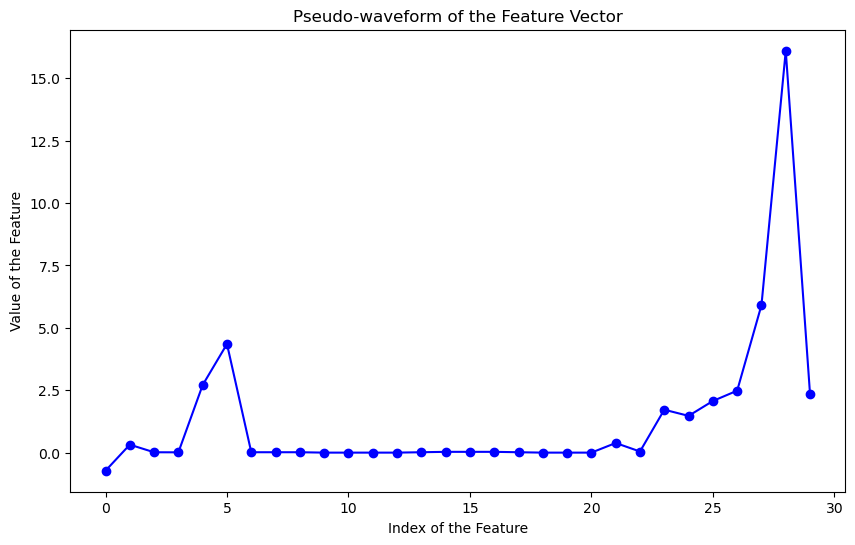

Feature Vector: [-7.25059656e-01  3.19224700e-01  1.43229167e-02  1.18625437e-02
  2.70895455e+00  4.35085265e+00  1.56250000e-02  1.56250000e-02
  1.56250000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.56250000e-02  3.12500000e-02  3.12500000e-02
  3.12500000e-02  1.56250000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.85318319e-01  4.45850906e-02  1.71922240e+00
  1.47237698e+00  2.06821437e+00  2.48167564e+00  5.90702446e+00
  1.60993678e+01  2.32966957e+00]


In [119]:
# Test compute_feature_vector
# Define the sampling frequency
Fs = 360

# Assume train_list[0] is the first waveform in the train set
first_waveform = train_set[0]  # Replace with actual waveform data if necessary

# Esegui la funzione per ottenere il feature vector
# Esegui questa riga solo dopo aver definito la funzione compute_feature_vector
f_vector = compute_feature_vector(first_waveform, Fs)

# Creiamo un array di "tempo" per rappresentare la sequenza di valori in modo continuo
time = np.arange(len(f_vector))

# Plot f_vector as a waveform
plt.figure(figsize=(10, 6))
plt.plot(time, f_vector, color='blue', marker='o', linestyle='-')
plt.title('Pseudo-waveform of the Feature Vector')
plt.xlabel('Index of the Feature')
plt.ylabel('Value of the Feature')
plt.show()

# Print the feature vector
print("Feature Vector:", f_vector)



In [120]:
# Compute feature vector for both training and test sets
N = 64
H = 16
Fs = 360

# Train
first, last = 0, len(train_set) 
train_fvector= []
for idx in tqdm(range(first, last)):
    first_waveform = train_set[idx]  # Replace with actual waveform data if necessary
    train_fvector.append(compute_feature_vector(first_waveform, Fs))

print(len(train_fvector))

# Test
first, last = 0, len(test_set) 
test_fvector= []
for idx in tqdm(range(first, last)):
    first_waveform = test_set[idx]  # Replace with actual waveform data if necessary
    test_fvector.append(compute_feature_vector(first_waveform, Fs))
print(len(test_fvector))

#the aim of the novelty function is to point out the peaks.  It is worth to add different rhythmic features since the data comparison between the istances 
#is more precise and also because the computational part is more efficient.

100%|█████████████████████████████████████████████████████████████████████████████| 8755/8755 [00:12<00:00, 713.65it/s]


8755


100%|█████████████████████████████████████████████████████████████████████████████| 2189/2189 [00:03<00:00, 694.04it/s]

2189


## Question 3

In [121]:
from sklearn.svm import SVC
import joblib
# Define model parameters
kernel = 'rbf'
C = 10
N = 64  # example window length (update as needed)
H = 16  # example hop size (update as needed)



# Train SVC
svm_model = SVC(C = C, kernel =kernel)

#save file
file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
os.makedirs("my_model", exist_ok=True)  # Create directory

# Save the model
joblib.dump(svm_model, file_name)


['my_model/svc_rbf_C_10_N_64_H_16']

In [122]:
# Print the accuracy on the training set
# Calculate accuracy on the training set
# Train (fit) the model on the training data
svm_model.fit(train_fvector, labels_train)
training_accuracy = svm_model.score(train_fvector, labels_train) 
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


Training Accuracy: 88.28%


In [123]:
# Classify the test set
from sklearn.metrics import accuracy_score


# Make predictions on the test set
test_predictions = svm_model.predict(test_fvector)



Test Accuracy: 87.35%


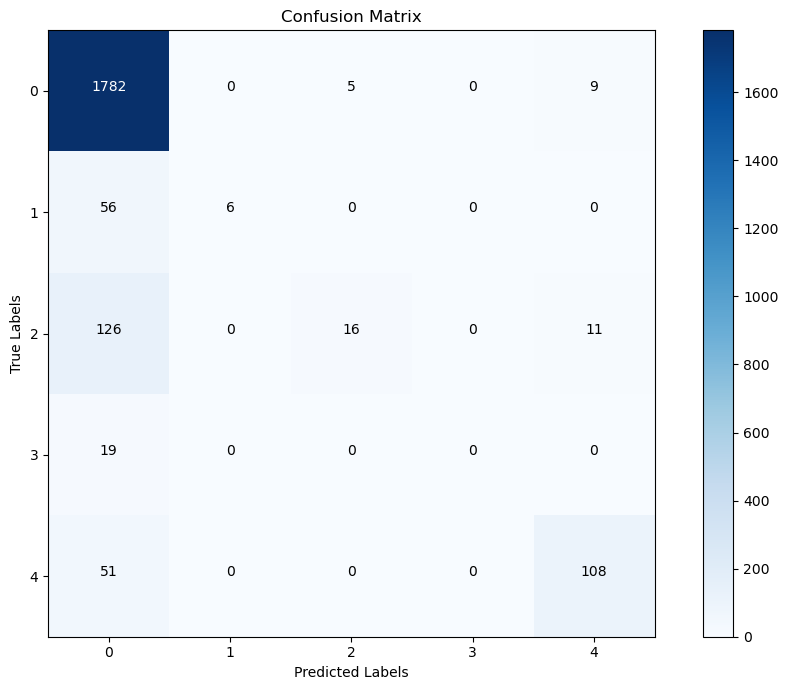

In [124]:
# Print the accuracy
# Calculate accuracy on the test set and print it
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, test_predictions)


# Plot the confusion matrix
plt.figure(figsize=(10, 7))

# Create a heatmap-like plot using imshow
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add color bar
plt.colorbar()

# Add class labels to the axes
tick_marks = np.arange(len(label_names))
plt.xticks(tick_marks, label_names)
plt.yticks(tick_marks, label_names)

# Annotate the confusion matrix with numbers
thresh = cm.max() / 2
for i in range(len(label_names)):
    for j in range(len(label_names)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Display the plot
plt.tight_layout()
plt.show()

In [125]:
# Classification report
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(labels_test, test_predictions, zero_division= False)
print(report)

# Initialize a dictionary to store false negatives by class
false_negatives_by_class = {}

# Loop through each abnormal class (1 to 4)
for class_idx in range(1, cm.shape[0]):
    false_negatives_by_class[class_idx] = cm[class_idx, 0]  # False negatives for each class (misclassified as class 0)

# Print the false negatives for each abnormal class
for cls, count in false_negatives_by_class.items():
    print(f"False Negatives for Class {cls} (misclassified as Normal): {count}")

# Optional: Total false negatives (all anomalies misclassified as normal)
total_false_negatives = sum(false_negatives_by_class.values())
print(f"Total False Negatives (anomalies classified as Normal): {total_false_negatives}")

###########################################false negative= unmatching class?????


              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1796
         1.0       1.00      0.10      0.18        62
         2.0       0.76      0.10      0.18       153
         3.0       0.00      0.00      0.00        19
         4.0       0.84      0.68      0.75       159

    accuracy                           0.87      2189
   macro avg       0.70      0.37      0.41      2189
weighted avg       0.86      0.87      0.84      2189

False Negatives for Class 1 (misclassified as Normal): 56
False Negatives for Class 2 (misclassified as Normal): 126
False Negatives for Class 3 (misclassified as Normal): 19
False Negatives for Class 4 (misclassified as Normal): 51
Total False Negatives (anomalies classified as Normal): 252


## Question 4

In [126]:
# Define Augmentation class
class augment:
    def __init__(self):
        pass
    
    def stretch(self, x):
        B = random.random()
        l = int(187 * (1 + (B - 0.5) / 3))
        y = scipy.signal.resample(x, l)
        if l < 187:
            y1 = np.zeros(187)
            y1[:l] = y
        else:
            y1 = y[:187]
        
        return y1

    def amplify(self, x):
        alpha = random.uniform(-0.5, 0.5)
        return x*(alpha + 1)
             
    def perform(self, x):
        # Initialize the performed augmentations tracker
        performed_augmentations = []
        
        # Randomly apply stretch
        if np.random.binomial(1, 0.5) == 1:
            x = self.stretch(x)  # Apply stretch to x
            performed_augmentations.append('stretch')
        
        # Randomly apply amplify
        if np.random.binomial(1, 0.5) == 1:
            x = self.amplify(x)  # Apply amplify to x
            performed_augmentations.append('amplify')
            
        return x, performed_augmentations




In [127]:
# New datasets
# Train
# Initialize an empty DataFrame to store the training dataset
train_df = pd.DataFrame()

# Get the unique class labels (last column)
class_labels = df.iloc[:, -1].unique()

# Iterate over each class and sample 641 instances from each class
for label in class_labels:
    # Select rows where the label is the current class
    class_data = df[df.iloc[:, -1] == label]
    
    # Sample 641 instances from the class (random_state ensures reproducibility)
    sampled_class_data = class_data.sample(641, random_state=42)
    
    # Append the sampled data to the train_df DataFrame
    train_df = pd.concat([train_df, sampled_class_data], axis=0)

# Check the shape of the resulting train_df
print("Shape of train_df:", train_df.shape)



# Test    
# Initialize an empty DataFrame to store the training dataset
test_df = pd.DataFrame()

# Get the unique class labels (last column)
class_labels2 = df2.iloc[:, -1].unique()

# Iterate over each class and sample 162 instances from each class
for label in class_labels2:
    # Select rows where the label is the current class
    class_data2 = df2[df2.iloc[:, -1] == label]
    
    # Sample 162 instances from the class (random_state ensures reproducibility)
    sampled_class_data2 = class_data2.sample(162, random_state=42)
    
    # Append the sampled data to the test_df DataFrame
    test_df = pd.concat([test_df, sampled_class_data2], axis=0) #axis=0 specifies that the concatenation is to be performed vertically

# Check the shape of the resulting test_df
print("Shape of test_df:", test_df.shape)



#convert dataframe to list
train_list = train_df.values.tolist()  
test_list = test_df.values.tolist()

Shape of train_df: (3205, 188)
Shape of test_df: (810, 188)


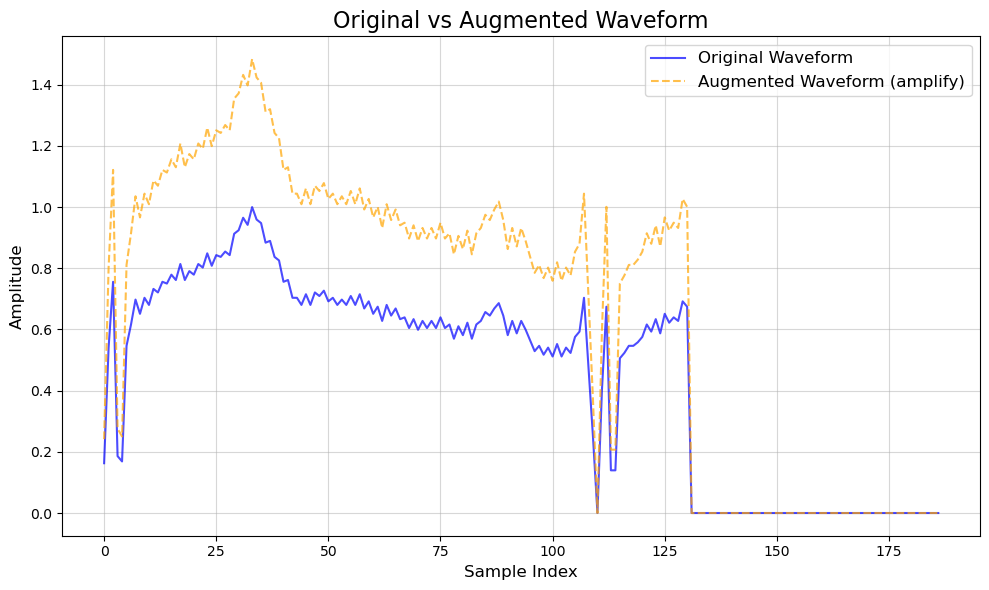

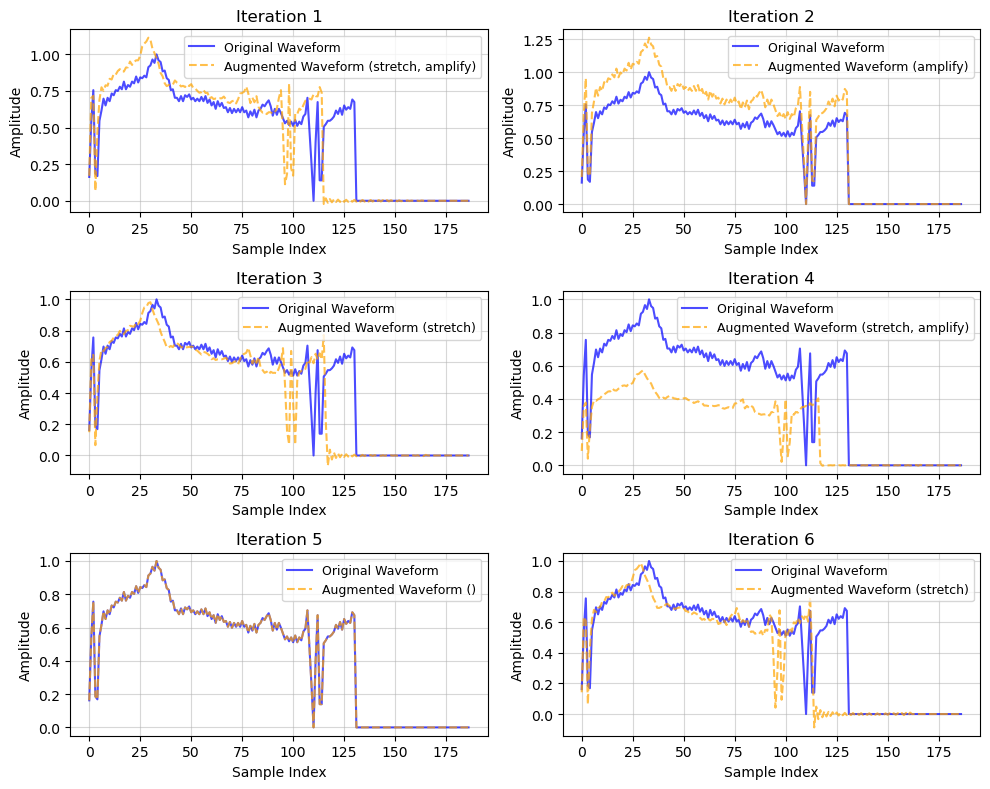

In [128]:
# Test augment class
# Instantiate augment class
augmenter = augment()

# Perform augmentation on the first item of train_list (excluding the last column)
x = np.array(train_list[0][:-1])  # Exclude the label column
augmented_x, augmentations = augmenter.perform(x)

# Plot
# Plot the original and augmented waveforms
plt.figure(figsize=(10, 6))
plt.plot(x, label="Original Waveform", color='blue', alpha=0.7)
plt.plot(augmented_x, label=f"Augmented Waveform ({', '.join(augmentations)})", color='orange', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title("Original vs Augmented Waveform", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


#multiple plots
# Set the figure size to make plots larger
plt.figure(figsize=(10, 8))  # Width x Height in inches

for idx in range(6):
    # Select the waveform and corresponding label 
    x = np.array(train_list[0][:-1])  # Original waveform
    augmented_x, augmentations = augmenter.perform(x)  # Augmented waveform

    # Add subplot for the current iteration
    plt.subplot(3, 2, idx + 1)
    
    # Plot original and augmented waveforms
    plt.plot(x, label="Original Waveform", color='blue', alpha=0.7)
    plt.plot(augmented_x, label=f"Augmented Waveform ({', '.join(augmentations)})", 
             color='orange', linestyle='--', alpha=0.7)
    
    # Add title, labels, and legend
    plt.title(f"Iteration {idx + 1}", fontsize=12)
    plt.xlabel("Sample Index", fontsize=10)
    plt.ylabel("Amplitude", fontsize=10)
    plt.legend(loc="best", fontsize=9)
    plt.grid(alpha=0.5)

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()

In [129]:
# Augment the train dataset
n_aug = 100

# Instantiate augment class
augmenter = augment()

augmented_df= pd.DataFrame()

# Iterate over each class and sample 162 instances from each class
for label in class_labels:
    # Select rows where the label is the current class
    class_data = df[df.iloc[:, -1] == label]
    
    # Sample 162 instances from the class (random_state ensures reproducibility)
    sampled_class_data = class_data.sample(n=n_aug, random_state=16)
    
    # Append the sampled data to the test_df DataFrame
    augmented_df = pd.concat([augmented_df, sampled_class_data], axis=0)
    
for idx in range(augmented_df.shape[0]):
    # Select the waveform and exclude the label (assumes labels are in the last column)
    x = np.array(augmented_df.iloc[idx, :-1])
    label = augmented_df.iloc[idx, -1]  # Keep the label as it is, assuming it's numeric

    # Perform augmentations
    augmented_x, _ = augmenter.perform(x)

    # Combine augmented data with the label
    new_row = np.append(augmented_x, label)  # Ensure the label is at the end
    new_row_df = pd.DataFrame([new_row], columns=train_df.columns)  # Match train_df's structure

    # Append the augmented data back to train_df
    train_df = pd.concat([train_df, new_row_df], ignore_index=True)


print(train_df.shape)
# Get the class distribution from the last column (index 187)
train_class_counts = train_df.iloc[:, -1].value_counts()

# Print the number of items in each class for both train and test datasets
print("Class distribution in the training set:")
print(train_class_counts)  



#covert to list
train_list = train_df.values.tolist()  
#####################################################################test_list is already a list!!!!!!!!!!!!!!!!!!!!!!!

(3705, 188)
Class distribution in the training set:
187
0.0    741
1.0    741
2.0    741
3.0    741
4.0    741
Name: count, dtype: int64


In [130]:
# Preprocessing
# Define the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))



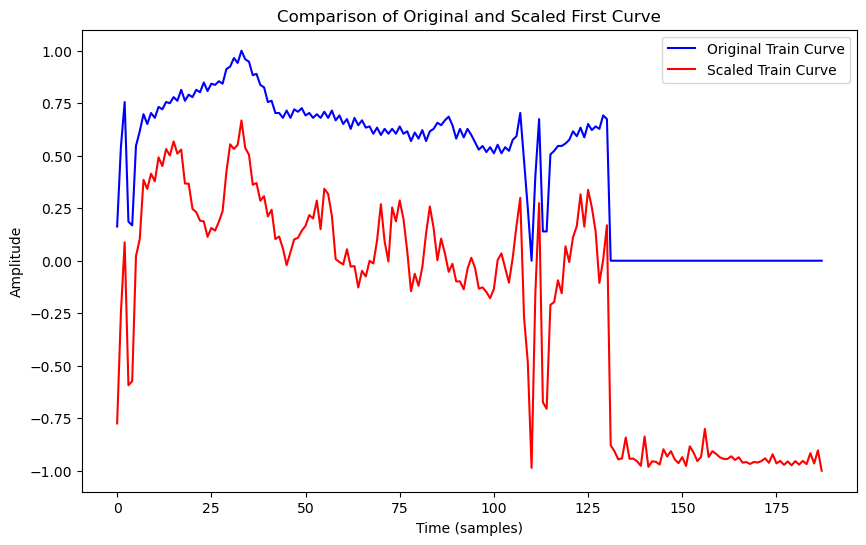

In [131]:
# Apply the scaler to the training data and store the result in train_set
train_set = scaler.fit_transform(train_list)

# Apply the same scaler to the test data and store the result in test_set
test_set = scaler.transform(test_list)



# Plot
# Plot the first curve from train_list and train_set
plt.figure(figsize=(10, 6))

# Plot the first curve from the original data (train_list)
plt.plot(train_list[0], label='Original Train Curve', color='blue')

# Plot the first curve after scaling (train_set)
plt.plot(train_set[0], label='Scaled Train Curve', color='red')

# Add labels and legend
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Scaled First Curve')
plt.legend()

# Show the plot
plt.show()



In [133]:
# Count the values for each class
# Train
labels_train = train_df.iloc[:, -1].tolist()
print('the dimensions of labels_train are',len(labels_train))




#Test 
labels_test = test_df.iloc[:, -1].tolist()
print('the dimensions of labels_test are',len(labels_test))

the dimensions of labels_train are 3705
the dimensions of labels_test are 810


## Question 5

In [134]:
# Compute feature vector for both training and test sets

N = 64
H = 16
Fs = 360

# Train
first, last = 0, len(train_set) 
train_fvector= []
for idx in tqdm(range(first, last)):
    first_waveform = train_set[idx]  # Replace with actual waveform data if necessary
    train_fvector.append(compute_feature_vector(first_waveform, Fs))

print(len(train_fvector))

# Test
first, last = 0, len(test_set) 
test_fvector= []
for idx in tqdm(range(first, last)):
    first_waveform = test_set[idx]  # Replace with actual waveform data if necessary
    test_fvector.append(compute_feature_vector(first_waveform, Fs))
print(len(test_fvector))



100%|█████████████████████████████████████████████████████████████████████████████| 3705/3705 [00:05<00:00, 700.11it/s]


3705


100%|███████████████████████████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 714.29it/s]

810


In [135]:
kernel = 'rbf'
C = 10


# Train SVC
svm_model = SVC(C = C, kernel =kernel)

#save file
file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
os.makedirs("my_model", exist_ok=True)  # Create directory

# Save the model
joblib.dump(svm_model, file_name)


# Train (fit) the model on the training data
svm_model.fit(train_fvector, labels_train)

SVC(C=10)

In [136]:
# Print the accuracy on the training set
training_accuracy = svm_model.score(train_fvector, labels_train) 
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


Training Accuracy: 73.68%


Test Accuracy: 70.86%


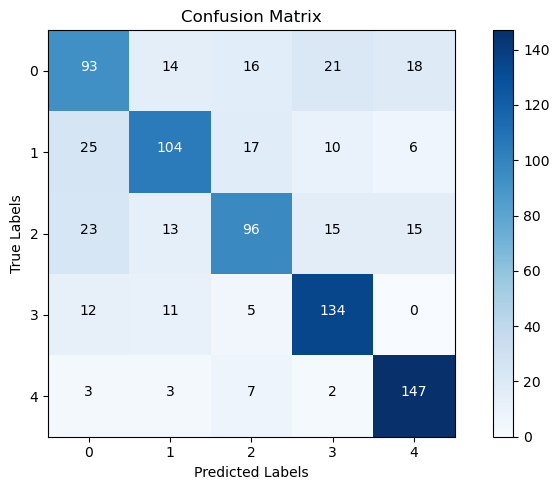

In [137]:
# Classify the test set
# Make predictions on the test set
test_predictions = svm_model.predict(test_fvector)


# Print the accuracy
# Calculate accuracy on the test set and print it
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Plot the confusion matrix
cm = confusion_matrix(labels_test, test_predictions)


# Plot the confusion matrix
plt.figure(figsize=(8, 5))

# Create a heatmap-like plot using imshow
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add color bar
plt.colorbar()

# Add class labels to the axes
tick_marks = np.arange(len(label_names))
plt.xticks(tick_marks, label_names)
plt.yticks(tick_marks, label_names)

# Annotate the confusion matrix with numbers
thresh = cm.max() / 2
for i in range(len(label_names)):
    for j in range(len(label_names)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Display the plot
plt.tight_layout()
plt.show()


In [138]:
# Classification report
# Compute classification report
report = classification_report(labels_test, test_predictions, zero_division= False)
print(report)

# Initialize a dictionary to store false negatives by class
false_negatives_by_class = {}

# Loop through each abnormal class (1 to 4)
for class_idx in range(1, cm.shape[0]):
    false_negatives_by_class[class_idx] = cm[class_idx, 0]  # False negatives for each class (misclassified as class 0)

# Print the false negatives for each abnormal class
for cls, count in false_negatives_by_class.items():
    print(f"False Negatives for Class {cls} (misclassified as Normal): {count}")

# Optional: Total false negatives (all anomalies misclassified as normal)
total_false_negatives = sum(false_negatives_by_class.values())
print(f"Total False Negatives (anomalies classified as Normal): {total_false_negatives}")


              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       162
         1.0       0.72      0.64      0.68       162
         2.0       0.68      0.59      0.63       162
         3.0       0.74      0.83      0.78       162
         4.0       0.79      0.91      0.84       162

    accuracy                           0.71       810
   macro avg       0.70      0.71      0.70       810
weighted avg       0.70      0.71      0.70       810

False Negatives for Class 1 (misclassified as Normal): 25
False Negatives for Class 2 (misclassified as Normal): 23
False Negatives for Class 3 (misclassified as Normal): 12
False Negatives for Class 4 (misclassified as Normal): 3
Total False Negatives (anomalies classified as Normal): 63


C:0.1
Training Accuracy: 58.62%
Test Accuracy: 59.14%


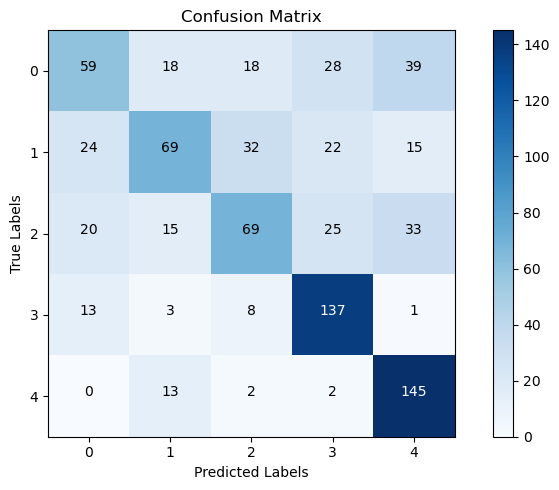

              precision    recall  f1-score   support

         0.0       0.51      0.36      0.42       162
         1.0       0.58      0.43      0.49       162
         2.0       0.53      0.43      0.47       162
         3.0       0.64      0.85      0.73       162
         4.0       0.62      0.90      0.73       162

    accuracy                           0.59       810
   macro avg       0.58      0.59      0.57       810
weighted avg       0.58      0.59      0.57       810

False Negatives for Class 1 (misclassified as Normal): 24
False Negatives for Class 2 (misclassified as Normal): 20
False Negatives for Class 3 (misclassified as Normal): 13
False Negatives for Class 4 (misclassified as Normal): 0
Total False Negatives (anomalies classified as Normal): 57
C:1
Training Accuracy: 66.96%
Test Accuracy: 64.20%


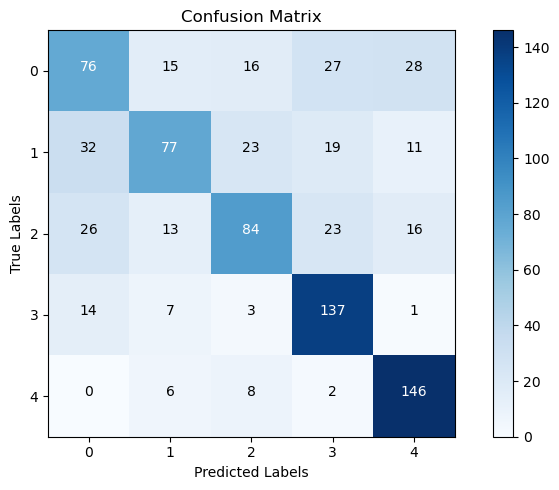

              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       162
         1.0       0.65      0.48      0.55       162
         2.0       0.63      0.52      0.57       162
         3.0       0.66      0.85      0.74       162
         4.0       0.72      0.90      0.80       162

    accuracy                           0.64       810
   macro avg       0.63      0.64      0.63       810
weighted avg       0.63      0.64      0.63       810

False Negatives for Class 1 (misclassified as Normal): 32
False Negatives for Class 2 (misclassified as Normal): 26
False Negatives for Class 3 (misclassified as Normal): 14
False Negatives for Class 4 (misclassified as Normal): 0
Total False Negatives (anomalies classified as Normal): 72
C:100
Training Accuracy: 80.43%
Test Accuracy: 75.19%


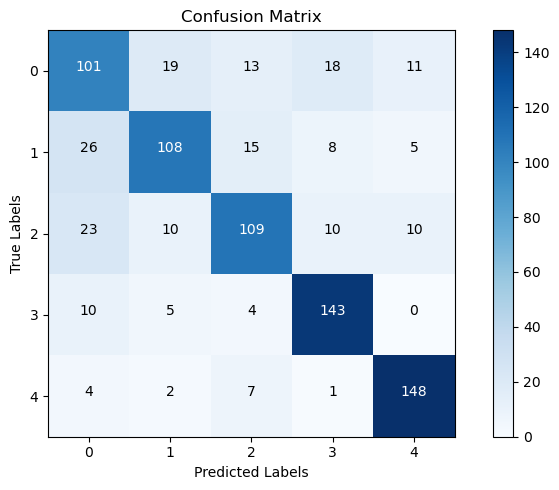

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       162
         1.0       0.75      0.67      0.71       162
         2.0       0.74      0.67      0.70       162
         3.0       0.79      0.88      0.84       162
         4.0       0.85      0.91      0.88       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class 1 (misclassified as Normal): 26
False Negatives for Class 2 (misclassified as Normal): 23
False Negatives for Class 3 (misclassified as Normal): 10
False Negatives for Class 4 (misclassified as Normal): 4
Total False Negatives (anomalies classified as Normal): 63
C:1000
Training Accuracy: 90.69%
Test Accuracy: 80.74%


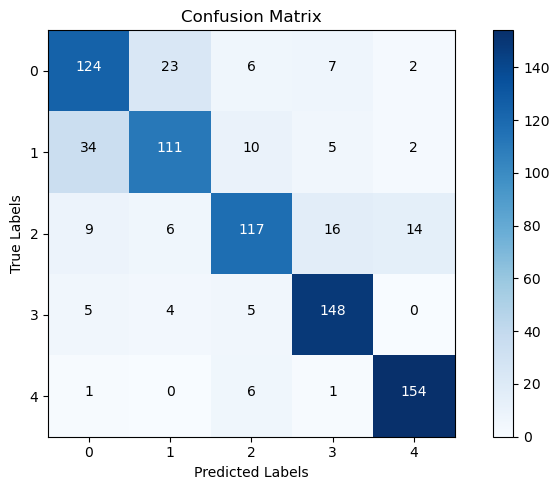

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       162
         1.0       0.77      0.69      0.73       162
         2.0       0.81      0.72      0.76       162
         3.0       0.84      0.91      0.87       162
         4.0       0.90      0.95      0.92       162

    accuracy                           0.81       810
   macro avg       0.81      0.81      0.81       810
weighted avg       0.81      0.81      0.81       810

False Negatives for Class 1 (misclassified as Normal): 34
False Negatives for Class 2 (misclassified as Normal): 9
False Negatives for Class 3 (misclassified as Normal): 5
False Negatives for Class 4 (misclassified as Normal): 1
Total False Negatives (anomalies classified as Normal): 49
C:10000
Training Accuracy: 96.60%
Test Accuracy: 82.35%


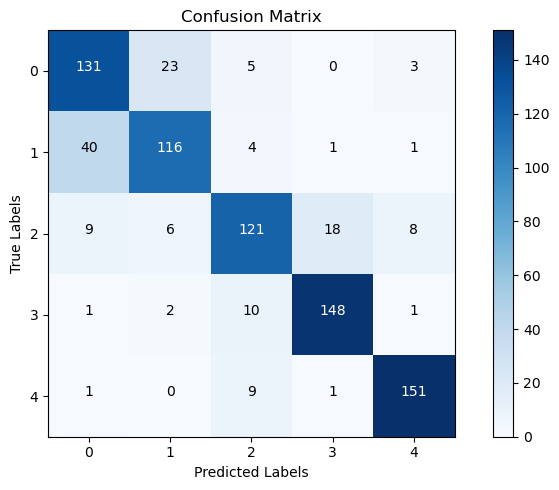

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       162
         1.0       0.79      0.72      0.75       162
         2.0       0.81      0.75      0.78       162
         3.0       0.88      0.91      0.90       162
         4.0       0.92      0.93      0.93       162

    accuracy                           0.82       810
   macro avg       0.82      0.82      0.82       810
weighted avg       0.82      0.82      0.82       810

False Negatives for Class 1 (misclassified as Normal): 40
False Negatives for Class 2 (misclassified as Normal): 9
False Negatives for Class 3 (misclassified as Normal): 1
False Negatives for Class 4 (misclassified as Normal): 1
Total False Negatives (anomalies classified as Normal): 51
C:100000
Training Accuracy: 99.38%
Test Accuracy: 80.37%


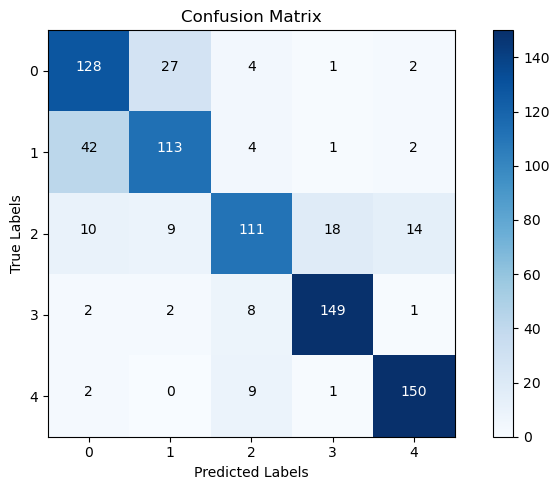

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       162
         1.0       0.75      0.70      0.72       162
         2.0       0.82      0.69      0.74       162
         3.0       0.88      0.92      0.90       162
         4.0       0.89      0.93      0.91       162

    accuracy                           0.80       810
   macro avg       0.80      0.80      0.80       810
weighted avg       0.80      0.80      0.80       810

False Negatives for Class 1 (misclassified as Normal): 42
False Negatives for Class 2 (misclassified as Normal): 10
False Negatives for Class 3 (misclassified as Normal): 2
False Negatives for Class 4 (misclassified as Normal): 2
Total False Negatives (anomalies classified as Normal): 56
[58.62, 66.96, 80.43, 90.69, 96.6, 99.38] [59.14, 64.2, 75.19, 80.74, 82.35, 80.37] [57, 72, 63, 49, 51, 56]


In [144]:
accuracy_list_train = []
accuracy_list_test = []
false_negatives = []
C_values = [0.1, 1, 100, 1000, 10000, 100000]
for C in C_values:
    # Train SVC
    svm_model = SVC(C = C, kernel =kernel)

    #save file
    file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
    os.makedirs("my_model", exist_ok=True)  # Create directory

    # Save the model
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the training data
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the training set
    training_accuracy = svm_model.score(train_fvector, labels_train) 
    accuracy_list_train.append(round(training_accuracy*100, 2))
    print(f"C:{C}")
    print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy
    test_accuracy = accuracy_score(labels_test, test_predictions)
    accuracy_list_test.append(round(test_accuracy*100, 2))
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 5))

    # Create a heatmap-like plot using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Add color bar
    plt.colorbar()

    # Add class labels to the axes
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks, label_names)
    plt.yticks(tick_marks, label_names)

    # Annotate the confusion matrix with numbers
    thresh = cm.max() / 2
    for i in range(len(label_names)):
        for j in range(len(label_names)):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    # Display the plot
    plt.tight_layout()
    plt.show()

    # Classification report
    report = classification_report(labels_test, test_predictions, zero_division= False)
    print(report)

    # Initialize a dictionary to store false negatives by class
    false_negatives_by_class = {}

    # Loop through each abnormal class (1 to 4)
    for class_idx in range(1, cm.shape[0]):
        false_negatives_by_class[class_idx] = cm[class_idx, 0]  # False negatives for each class (misclassified as class 0)
        

    # Print the false negatives for each abnormal class
    for cls, count in false_negatives_by_class.items():
        print(f"False Negatives for Class {cls} (misclassified as Normal): {count}")

    # Optional: Total false negatives (all anomalies misclassified as normal)
    total_false_negatives = sum(false_negatives_by_class.values())
    print(f"Total False Negatives (anomalies classified as Normal): {total_false_negatives}")
    false_negatives.append(total_false_negatives)



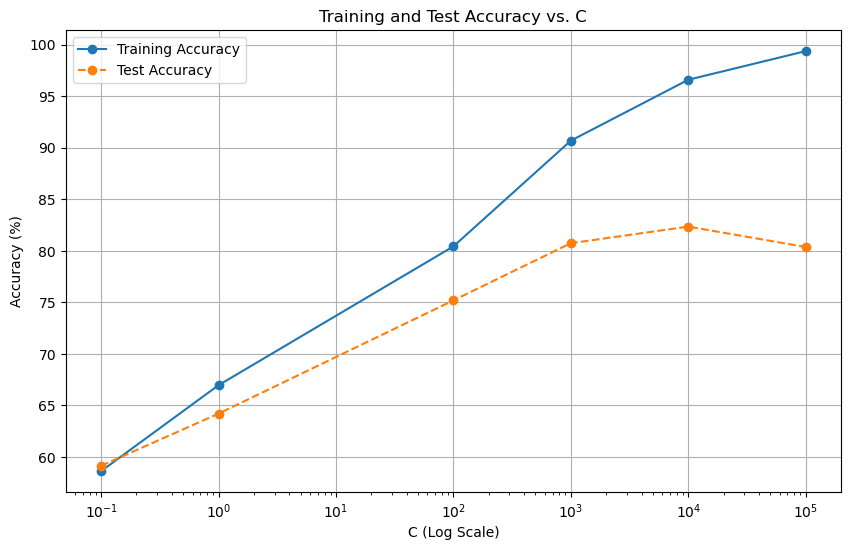

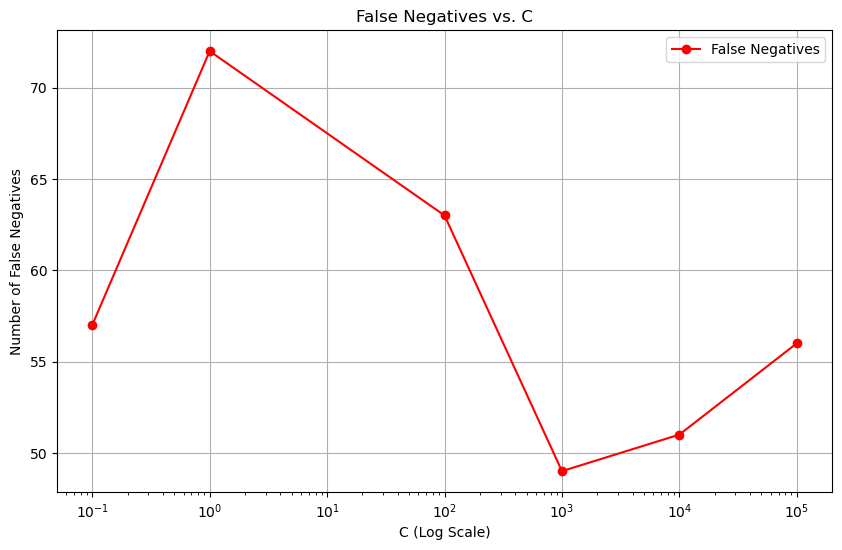

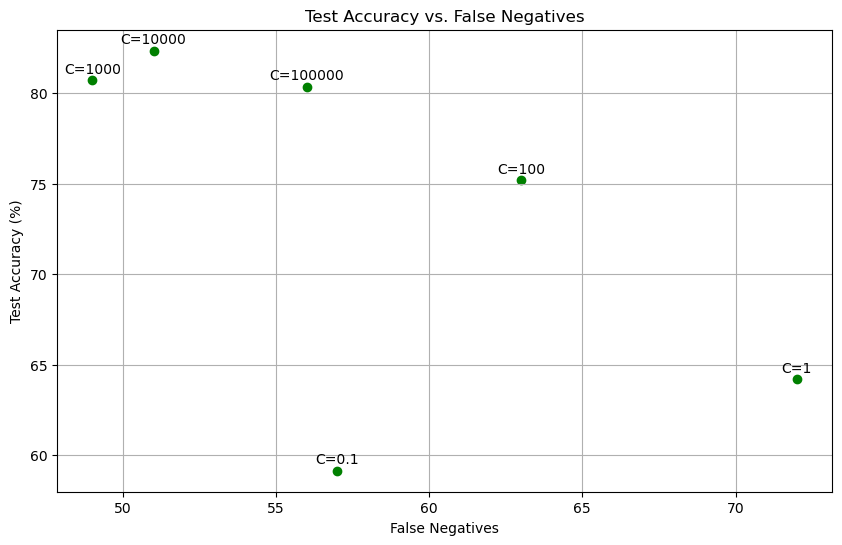

In [146]:
print(accuracy_list_train, accuracy_list_test, false_negatives )

# Plot 1: Accuracy on Training and Test Sets
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_list_train, label="Training Accuracy", marker='o')
plt.plot(C_values, accuracy_list_test, label="Test Accuracy", marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy vs. C')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: False Negatives vs. C
plt.figure(figsize=(10, 6))
plt.plot(C_values, false_negatives, label="False Negatives", marker='o', color='r')
plt.xscale('log')
plt.xlabel('C (Log Scale)')
plt.ylabel('Number of False Negatives')
plt.title('False Negatives vs. C')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Scatter Plot of Test Accuracy vs. False Negatives
plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(false_negatives, accuracy_list_test, color='g', marker='o')

# Etichette per i punti
for i, txt in enumerate(C_values):
    plt.annotate(f'C={txt}', (false_negatives[i], accuracy_list_test[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Etichette degli assi
plt.xlabel('False Negatives')
plt.ylabel('Test Accuracy (%)')
# Titolo del grafico
plt.title('Test Accuracy vs. False Negatives')
# Griglia
plt.grid(True)
# Mostra il grafico
plt.show()

In [ ]:
kernel = ['rbf','linear']
C = 1000


# Train SVC
svm_model = SVC(C = C, kernel =kernel)

#save file
file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
os.makedirs("my_model", exist_ok=True)  # Create directory

# Save the model
joblib.dump(svm_model, file_name)


# Train (fit) the model on the training data
svm_model.fit(train_fvector, labels_train)